Month describe mean, std etc. values

In [79]:
from asyncio.log import logger
from datetime import datetime
from tkinter import messagebox
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import logging
import time
import calendar
import string
import tkinter as tk
from numpy import isin
import numpy as np

In [80]:
MONTHS_DF = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv"
)
MONTHS_DF.pop("entry_id")

0              1
1              2
2              3
3              4
4              5
           ...  
260378    260389
260379    260390
260380    260391
260381    260392
260382    260393
Name: entry_id, Length: 260383, dtype: int64

In [81]:
# all months desribe
DESCRIBE_DF = MONTHS_DF.describe()

In [82]:
# Months describe() functions


def get_month(month: str):

    if month == "November":
        start_date = "13/11/21"
        end_date = f"{calendar.monthrange(2021, 11)[1]}/11/21"
        end_date = "14/11/21"

    elif month == "December":
        start_date = "01/12/21"
        end_date = f"{calendar.monthrange(2021, 12)[1]}/12/21"

    elif month == "January":
        start_date = "01/01/22"
        end_date = f"{calendar.monthrange(2022, 1)[1]}/01/22"

    elif month == "February":
        start_date = "01/02/2022"
        end_date = f"{calendar.monthrange(2022, 2)[1]}/02/22"

    elif month == "March":
        start_date = "01/03/2022"
        end_date = f"{calendar.monthrange(2022, 3)[1]}/03/22"

    return [start_date, end_date]


def get_months() -> list:
    months = ["November", "December", "January", "February", "March"]
    return months


def get_month_describe(
    df: pd.DataFrame, start_date: str, end_date: str
) -> pd.DataFrame:

    df["date"] = pd.to_datetime(df["date"])
    new_df = (df["date"] >= start_date) & (df["date"] <= end_date)
    df1 = df.loc[new_df]
    df2 = df1.set_index("date")
    print()

    return df2.describe()


def plot_data(df: pd.DataFrame, start_date: str, end_date: str) -> None:

    df["date"] = pd.to_datetime(df["date"])
    new_df = (df["date"] >= start_date) & (df["date"] <= end_date)
    df2 = df.loc[new_df]
    plt.figure(figsize=(20, 14))
    df2.plot(x="date", y=["PM1", "PM2.5"])
    plt.xlabel("Date -->", fontsize=14, color="green")
    plt.ylabel("Values -->", fontsize=14, color="red")
    plt.show()

In [83]:
"""
MONTHS DATAFRAMES
"""
NOVEMBER_DF = pd.DataFrame()
DECEMBER_DF = pd.DataFrame()
JANUARY_DF = pd.DataFrame()
FEBRUARY_DF = pd.DataFrame()
MARCH_DF = pd.DataFrame()
MONTHS = [NOVEMBER_DF, DECEMBER_DF, JANUARY_DF, FEBRUARY_DF, MARCH_DF]
df_drops = ["count", "std" "25%", "50%", "75%"]
df_drops_len = len(df_drops)
GET_MONTHS = [
    get_month_describe(MONTHS_DF, get_month(i)[0], get_month(i)[1]).drop("count")
    for i in get_months()
]

In [84]:
"""
November
"""
# GET_MONTHS[0].to_csv("csv_month_describe/November_desc.csv")
GET_MONTHS[0]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,49.277858,82.463097,101.574530,8.139045,1011.955031,64.824225
std,13.703837,24.998429,26.902532,14.002077,95.703720,8.899436
min,0.000000,0.000000,0.000000,3.880000,-241.325000,30.946290
25%,39.000000,63.000000,83.000000,4.810000,1018.392060,58.098145
50%,44.000000,75.000000,94.000000,5.930000,1019.437190,65.873050
75%,63.000000,104.000000,119.000000,9.125000,1019.781040,72.398925
max,91.000000,170.000000,202.000000,187.140000,1020.789430,100.000000


In [85]:
"""
December
"""
# GET_MONTHS[1].to_csv("csv_month_describe/December_desc.csv")
GET_MONTHS[1]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,35.875725,58.835918,74.476098,8.345616,979.279155,74.478534
std,17.666028,33.610636,41.447102,31.448645,212.250698,11.137874
min,0.000000,0.000000,0.000000,-11.130000,-242.967190,0.000000
25%,26.000000,40.000000,50.000000,0.620000,1007.407807,69.762938
50%,33.000000,52.000000,69.000000,4.000000,1016.788055,76.425290
75%,41.000000,66.000000,87.000000,6.410000,1024.485842,80.371335
max,224.000000,581.000000,854.000000,187.140000,1307.648930,100.000000


In [86]:
"""
January
"""
# GET_MONTHS[2].to_csv("csv_month_describe/January_desc.csv")
GET_MONTHS[2]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,25.322752,39.652647,50.399491,1.897836,1022.977023,70.757397
std,15.413274,27.086454,34.511903,3.534200,9.827076,10.490680
min,0.000000,0.000000,0.000000,-6.330000,994.319580,24.324220
25%,14.000000,20.000000,24.000000,-0.540000,1015.825560,64.586910
50%,24.000000,36.000000,45.000000,1.620000,1024.031620,73.167970
75%,34.000000,53.000000,70.000000,3.430000,1030.290040,78.658200
max,141.000000,332.000000,450.000000,14.190000,1038.802860,93.930660


In [87]:
"""
February
"""
# GET_MONTHS[3].to_csv("csv_month_describe/February_desc.csv")
GET_MONTHS[3]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,22.593493,35.090585,44.280966,3.807126,1018.125676,66.426695
std,16.053350,27.886061,35.251755,7.789030,47.015219,13.234072
min,0.000000,0.000000,0.000000,-142.590000,-242.100950,0.000000
25%,10.000000,14.000000,16.750000,0.940000,1012.832120,59.461910
50%,21.000000,31.000000,37.000000,2.960000,1019.751615,69.452150
75%,31.000000,49.000000,64.000000,6.040000,1028.043090,76.193360
max,224.000000,490.000000,608.000000,187.140000,1303.550170,100.000000


In [88]:
"""
March
"""
# GET_MONTHS[4].to_csv("csv_month_describe/March_desc.csv")
GET_MONTHS[4]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,26.472907,41.577167,52.006770,5.247507,1022.142579,57.048657
std,17.696018,31.703597,39.567752,8.110835,38.028297,19.392108
min,0.000000,0.000000,0.000000,-142.590000,-242.100950,0.000000
25%,14.000000,19.000000,23.000000,1.080000,1015.510495,42.671880
50%,24.000000,36.000000,45.000000,3.660000,1024.302610,61.595700
75%,35.000000,55.000000,72.000000,7.840000,1031.250490,73.004395
max,286.000000,702.000000,948.000000,187.140000,1303.550170,100.000000


November


<Figure size 1440x1008 with 0 Axes>

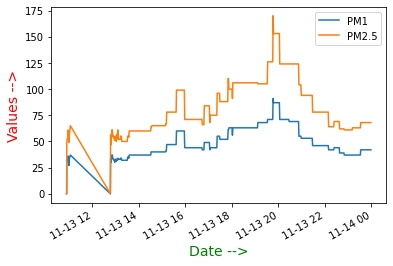

December


<Figure size 1440x1008 with 0 Axes>

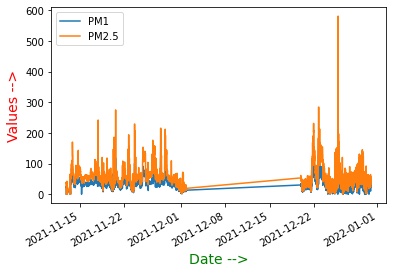

January


<Figure size 1440x1008 with 0 Axes>

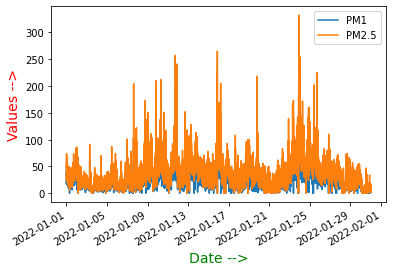

February


<Figure size 1440x1008 with 0 Axes>

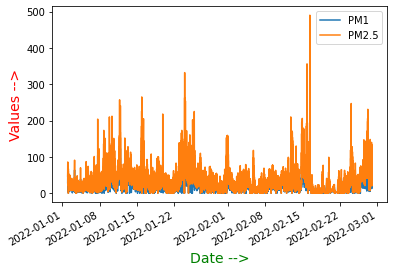

March


<Figure size 1440x1008 with 0 Axes>

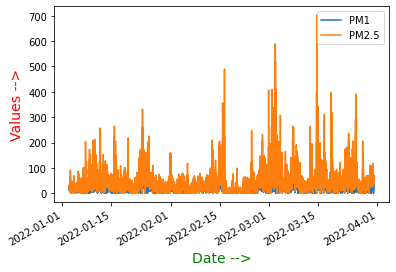

In [89]:
for i in get_months():
    print(i)
    plot_data(MONTHS_DF, get_month(i)[0], get_month(i)[1])